# CODE FOR RECOMMENDATION SYSTEM

In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'indonesia-tourism-destination:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1481754%2F2448367%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240516%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240516T034915Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4bd26111fb2182ce1f231efbc3a95edb9575c75e5ef1818da6f70e26e70f4f108e055aded5b97dc88bd431accc4aab2670c491685a2c62fb0439df93589cdc387aa9e07a607a7b9701dc52a24af6caed21df6a915629bab4c6d880bed3a6570673a053fbc2b345432ed870fe81fb71a73ce7e67aed81ce6b56257e15d24838d7c8dbbb7c49ced58c750286561c9cbcf3f466476291106bc4e97ccdba866085f557c934c422ced2a66da205916261f93eae3ee6bb8b541fa6b2acb771375ef821ab1c110b7d460adbb72a995e88b0acd1276ae05a537eaf7a05b8dc2a608398c998bbf47a08e6cd35e282e16330dd7eb9f4eb89ffd2545f3e7f869916b93df3c8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 162193 bytes downloaded
Downloaded and uncompressed: indonesia-tourism-destination
Data source import complete.


# Data Understanding

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "../input/indonesia-tourism-destination"

info_tourism = pd.read_csv(f"{DATA_PATH}/tourism_with_id.csv")
tourism_rating = pd.read_csv(f"{DATA_PATH}/tourism_rating.csv")
users = pd.read_csv(f"{DATA_PATH}/user.csv")

In [ ]:
info_tourism.sample(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
34,35,Grand Indonesia Mall,Grand Indonesia merupakan mal di Jakarta. Mal ...,Pusat Perbelanjaan,Jakarta,0,4.7,120.0,"{'lat': -6.195180099999999, 'lng': 106.8204412}",-6.195180,106.820441,NaN,35
92,93,Gembira Loka Zoo,Kebun Binatang Gembira Loka biasa disebut Gemb...,Cagar Alam,Yogyakarta,60000,4.5,NaN,"{'lat': -7.806234399999999, 'lng': 110.3967977}",-7.806234,110.396798,NaN,93
179,180,Pantai Depok Jogja,"Pantai Depok (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ ꦝꦺꦥꦺꦴꦏ꧀, tra...",Bahari,Yogyakarta,10000,4.3,NaN,"{'lat': -8.0137087, 'lng': 110.2914777}",-8.013709,110.291478,NaN,180
191,192,Air Terjun Sri Gethuk,Air Terjun Sri Gethuk merupakan salah satu obj...,Cagar Alam,Yogyakarta,15000,4.4,NaN,"{'lat': -7.943178000000001, 'lng': 110.48924}",-7.943178,110.489240,NaN,192
115,116,Jurang Tembelan Kanigoro,Jurang Tembelan Kanigoro berada di Desa Wisata...,Taman Hiburan,Yogyakarta,2500,4.5,45.0,"{'lat': -7.940106500000001, 'lng': 110.4300062}",-7.940106,110.430006,NaN,116


In [ ]:
tourism_rating.sample(5)

,User_Id,Place_Id,Place_Ratings
8521,257,338,2
6060,182,288,2
5733,173,383,2
5250,159,100,5
9660,290,152,1


In [ ]:
users.sample(5)

,User_Id,Location,Age
35,36,"Solo, Jawa Tengah",20
122,123,"Bekasi, Jawa Barat",32
214,215,"Yogyakarta, DIY",23
93,94,"Semarang, Jawa Tengah",34
21,22,"Subang, Jawa Barat",25


In [ ]:
print(f"Number of places in the datasets : {len(info_tourism.Place_Id.unique())}")
print(f"Number of users : {len(users.User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(tourism_rating.User_Id)}")

Number of places in the datasets : 437
Number of users : 300
The number of ratings given by the user to the dataset : 10000


# Exploratory Data Analysis

In [ ]:
info_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [ ]:
info_tourism.isnull().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [ ]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
tourism_rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [ ]:
users.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [ ]:
info_tourism.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

# Data Preprocessing

In [ ]:
import numpy as np

tourism_all = np.concatenate((
    info_tourism.Place_Id.unique(),
    tourism_rating.Place_Id.unique()
))

tourism_all = np.sort(np.unique(tourism_all))

print(f"Total number of tourism: {len(tourism_all)}")

Total number of tourism: 437


In [ ]:
all_tourism_rate = tourism_rating
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [ ]:
all_tourism = pd.merge(all_tourism_rate,info_tourism[["Place_Id","Place_Name","Description","City","Category"]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


In [ ]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)

In [ ]:
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,Jakarta Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,Bandung Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


# Data Preparation

## Missing Values

In [ ]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
city_category    0
dtype: int64

In [ ]:
preparation= all_tourism.drop_duplicates("Place_Id")
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,Semarang Budaya
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,Semarang Bahari
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,Jakarta Bahari
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,Jakarta Cagar Alam


In [ ]:
place_id = preparation.Place_Id.tolist()

place_name = preparation.Place_Name.tolist()

place_category = preparation.Category.tolist()

place_desc = preparation.Description.tolist()

place_city = preparation.City.tolist()

city_category = preparation.city_category.tolist()

In [ ]:
tourism_new = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
    "city_category":city_category
})

tourism_new

,id,name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya
...,...,...,...,...,...,...
432,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya
433,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Semarang Bahari
434,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Jakarta Bahari
435,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Jakarta Cagar Alam


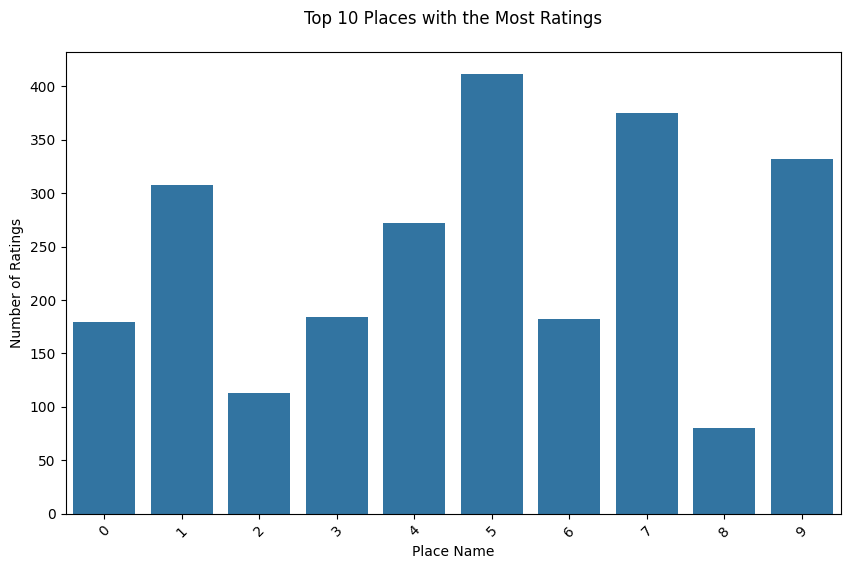

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'tourism_new' and 'preparation' are DataFrames that contain the necessary columns

# Get the top 10 places based on the count of 'id' in 'tourism_new'
top_10 = tourism_new['id'].value_counts().reset_index().head(10)

# Merge with 'preparation' DataFrame to get the names of the places
top_10 = pd.merge(top_10, preparation[['Place_Id', 'Place_Name']], how='left', left_index = True ,right_on='Place_Id')

# Plot the bar chart for visualization
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='Place_Id', y='id', data=top_10)
plt.title('Top 10 Places with the Most Ratings', pad=20)
plt.xlabel('Place Name')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()


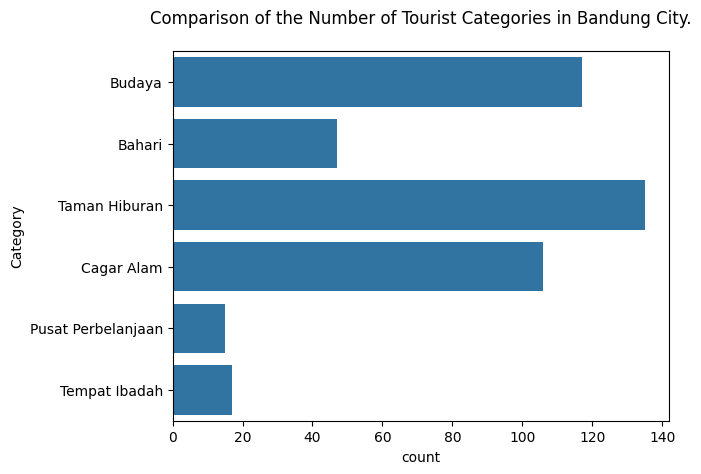

In [ ]:
sns.countplot(y='Category', data=preparation)
plt.title("Comparison of the Number of Tourist Categories in Bandung City.", pad=20)
plt.show()

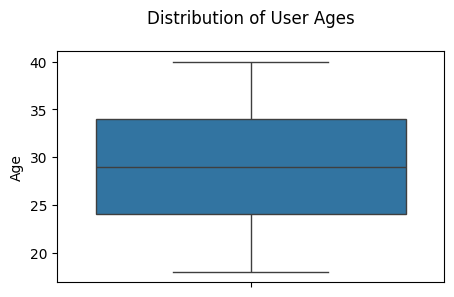

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(users['Age']);
plt.title('Distribution of User Ages', pad=20)
plt.show()

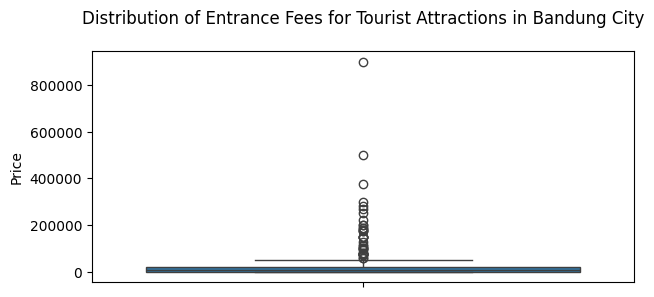

In [ ]:
plt.figure(figsize=(7,3))
sns.boxplot(info_tourism['Price'])
plt.title('Distribution of Entrance Fees for Tourist Attractions in Bandung City', pad=20)
plt.show()

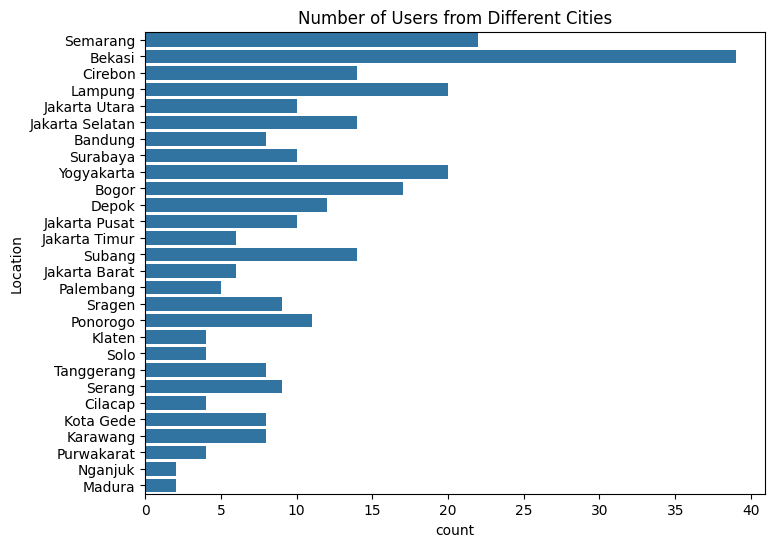

In [ ]:
askot = users['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Number of Users from Different Cities')
plt.show()

####

# Content Based Filtering

In [ ]:
data = tourism_new
data.sample(5)

,id,name,category,description,city,city_category
223,194,Pantai Wediombo,Bahari,Pantai Wediombo (O Jawa: Wedhiamba) adalah seb...,Yogyakarta,Yogyakarta Bahari
361,356,Saloka Theme Park,Taman Hiburan,SALOKA hadir sebagai taman rekreasi terbesar d...,Semarang,Semarang Taman Hiburan
20,428,Monumen Bambu Runcing Surabaya,Budaya,Monumen Bambu Runcing adalah ikon pariwisata S...,Surabaya,Surabaya Budaya
127,334,Chingu Cafe Little Seoul,Taman Hiburan,Selain populer karena memiliki pemandangan yan...,Bandung,Bandung Taman Hiburan
230,65,Museum Basoeki Abdullah,Budaya,Museum Basoeki Abdullah berisi lukisan dan kol...,Jakarta,Jakarta Budaya


## TF-IDF Vectorizer (Term Frequency-Inverse Document Frequency)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(data['city_category'])

print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


In [ ]:
cv_matrix = cv.transform(data['city_category'])

cv_matrix.shape

(437, 15)

In [ ]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1]])

In [ ]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data.name
).sample(5)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Museum Sasmita Loka Ahmad Yani,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
Gua Pawon,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
Candi Gedong Songo,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
Taman Bunga Celosia,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
Jogja Bay Pirates Adventure Waterpark,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


## Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40824829],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.40824829, 0.33333333,
        0.66666667],
       ...,
       [0.        , 0.5       , 0.40824829, ..., 1.        , 0.40824829,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.40824829, 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=data['name'],columns=data['name'])
cosine_sim_df.sample(5,axis=1).sample(10,axis=0)

name,Margasatwa Muara Angke,House of Sampoerna,Patung Buddha Empat Rupa,Keraton Surabaya,Taman Lansia
name,,,,,
Taman Harmoni Keputih,0.666667,0.408248,0.408248,0.408248,0.000000
Watu Mabur Mangunan,0.666667,0.000000,0.000000,0.000000,0.000000
Alun-Alun Kota Bandung,0.000000,0.000000,0.000000,0.000000,1.000000
The Lost World Castle,0.000000,0.000000,0.000000,0.000000,0.666667
Museum Kebangkitan Nasional,0.408248,0.500000,0.500000,0.500000,0.000000
Kampung Korea Bandung,0.000000,0.500000,0.500000,0.500000,0.408248
Water Park Bandung Indah,0.000000,0.000000,0.000000,0.000000,1.000000
Pantai Kukup,0.000000,0.000000,0.000000,0.000000,0.000000
Gereja Katedral,0.333333,0.000000,0.000000,0.000000,0.000000


## Recommendation

In [ ]:
def tourism_recommendations(place_name,similarity_data=cosine_sim_df,items=data[['name','category','description','city']],k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(place_name,errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
tourism_recommendations("Air Mancur Menari")

,name,category,description,city
0,Taman Prestasi,Taman Hiburan,Taman Prestasi Surabaya merupakan salah satu t...,Surabaya
1,Taman Pelangi,Taman Hiburan,Kalau pelangi biasanya ada di siang hari pasca...,Surabaya
2,Atlantis Land Surabaya,Taman Hiburan,"Sejak diresmikan pada bulan Desember 2017, Atl...",Surabaya
3,Taman Buah Surabaya,Taman Hiburan,Wisata Taman Buah Undaan di Surabaya adalah sa...,Surabaya
4,Taman Keputran,Taman Hiburan,"Ntah, mengapa nama taman ini disebut dengan ta...",Surabaya


In [ ]:
tourism_recommendations("Trans Studio Bandung")

,name,category,description,city
0,Puspa Iptek Sundial,Taman Hiburan,Puspa Iptek Sundial adalah wahana pendidikan y...,Bandung
1,Teras Cikapundung BBWS,Taman Hiburan,Teras Cikapundung Bandung sebelumnya merupakan...,Bandung
2,Chingu Cafe Little Seoul,Taman Hiburan,Selain populer karena memiliki pemandangan yan...,Bandung
3,Taman Badak,Taman Hiburan,Taman Badak ini baru saja diresmikan pada tang...,Bandung
4,NuArt Sculpture Park,Taman Hiburan,NuArt Sculpture Park ini merupakan sebuah gall...,Bandung


# Collaborative Filtering

In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
df = tourism_rating
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


## Data Preparation

### Encode

In [ ]:
user_ids = df.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [ ]:
place_ids = df.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [ ]:
df['user'] = df.User_Id.map(user_to_user_encoded)

df['place'] = df.Place_Id.map(place_to_place_encoded)

In [ ]:
num_users = len(user_to_user_encoded)

num_place = len(place_encoded_to_place)

df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

min_rating = min(df['Place_Ratings'])

max_rating= max(df['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


## Train Test Split

In [ ]:
df = df.sample(frac=1,random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


In [ ]:
x = df[['user','place']].values

y = df['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8 * df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


## Training

In [ ]:
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.place_embedding = layers.Embedding(
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    place_vector = self.place_embedding(inputs[:, 1])
    place_bias = self.place_bias(inputs[:, 1])

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x)

In [ ]:
model = RecommenderNet(num_users, num_place, 100)

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100
1000/1000 [==============================] - 8s 6ms/step - loss: 0.6951 - root_mean_squared_error: 0.3465 - val_loss: 0.6975 - val_root_mean_squared_error: 0.3480
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6868 - root_mean_squared_error: 0.3406 - val_loss: 0.6982 - val_root_mean_squared_error: 0.3484
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6840 - root_mean_squared_error: 0.3385 - val_loss: 0.6982 - val_root_mean_squared_error: 0.3483
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6791 - root_mean_squared_error: 0.3349 - val_loss: 0.6981 - val_root_mean_squared_error: 0.3482
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6770 - root_mean_squared_error: 0.3333 - val_loss: 0.6973 - val_root_mean_squared_error: 0.3476
Epoch 6/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6711 - root_mean_squared_error: 0.3290 - val_l

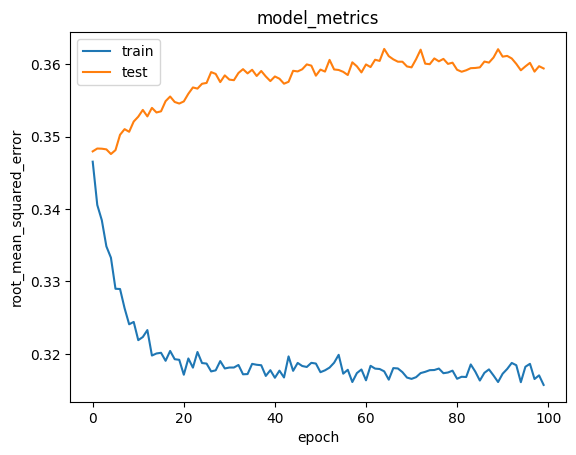

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Recommendation

In [ ]:
place_df = tourism_new
df = pd.read_csv(f'{DATA_PATH}/tourism_rating.csv')

user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [ ]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Place with high ratings from user')
print('----' * 8)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['id'].isin(top_place_user)]
pd.DataFrame(place_df_rows)

13/13 [==============================] - 0s 2ms/step
Showing recommendations for users: 114
Place with high ratings from user
--------------------------------


,id,name,category,description,city,city_category
51,166,Kebun Teh Nglinggo,Cagar Alam,Wisata Kebun Teh Nglinggo adalah satu-satunya ...,Yogyakarta,Yogyakarta Cagar Alam
115,391,Flower Farm Setiya Aji,Cagar Alam,Di taman bunga Setiya Aji Flower Farm kita bis...,Semarang,Semarang Cagar Alam
209,339,Sam Poo Kong Temple,Budaya,"Sam Poo Kong (Hanzi: ; Pinyin: Sānbǎo Dòng), j...",Semarang,Semarang Budaya
370,263,Curug Batu Templek,Cagar Alam,Curug Batu Templek Bandung adalah sebuah wisat...,Bandung,Bandung Cagar Alam
385,282,Curug Cilengkrang,Cagar Alam,Curug Cilengkrang bisa menjadi pilihan tujuan ...,Bandung,Bandung Cagar Alam


In [ ]:
print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
recommended_place

--------------------------------
Top 10 place recommendation
--------------------------------


,id,name,category,description,city,city_category
76,134,Desa Wisata Gamplong,Taman Hiburan,Desa Wisata Gamplong adalah desa wisata keraji...,Yogyakarta,Yogyakarta Taman Hiburan
102,97,Monumen Yogya Kembali,Budaya,Museum Monumen Yogya Kembali (bahasa Jawa: ꦩꦺꦴ...,Yogyakarta,Yogyakarta Budaya
126,115,Monumen Sanapati,Budaya,Monumen Sanapati dibangun untuk memeringati 50...,Yogyakarta,Yogyakarta Budaya
149,126,Pantai Goa Cemara,Bahari,Pantai Goa Cemara (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ ꦒꦸꦮ​ ꦕ...,Yogyakarta,Yogyakarta Bahari
226,94,Sumur Gumuling,Taman Hiburan,Sumur Gumuling adalah salah satu tempat untuk ...,Yogyakarta,Yogyakarta Taman Hiburan
273,132,Air Terjun Kedung Pedut,Cagar Alam,Air Terjun Kedung Pedut atau biasa disebut Cur...,Yogyakarta,Yogyakarta Cagar Alam
302,112,Bukit Bintang Yogyakarta,Taman Hiburan,Bukit Bintang merupakan salah satu lokasi nong...,Yogyakarta,Yogyakarta Taman Hiburan
323,83,Alive Museum Ancol,Taman Hiburan,Museum kini tidak hanya menawarkan benda – ben...,Jakarta,Jakarta Taman Hiburan
392,122,Watu Goyang,Budaya,Watu Goyang ini berasal dari Bahasa Jawa yang ...,Yogyakarta,Yogyakarta Budaya
398,117,The World Landmarks - Merapi Park Yogyakarta,Taman Hiburan,Merapi Park merupakan salah satu tempat wisata...,Yogyakarta,Yogyakarta Taman Hiburan
